<a href="https://colab.research.google.com/github/PrabishaPradeep/Dsa/blob/main/Case_Study_on_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study on Regression

### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler

### Load the dataset

In [2]:
car_data=pd.read_csv('/content/car_age_price.csv')
car_data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


The given dataset contains price of second-hand Hyundai grand i10 car with respect to year of making.

### Check basic details

In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


No null values present in the dataset. Also there are no categorical variables present. So no need of encoding.

In [4]:
car_data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


1.  Most cars are from 2017 or earlier, with a few newer models up to 2020.
2.  The prices range from 300,000 to 755,000, with most cars priced around 500,000 to 550,000.

### Box plot to check outliers

<Axes: >

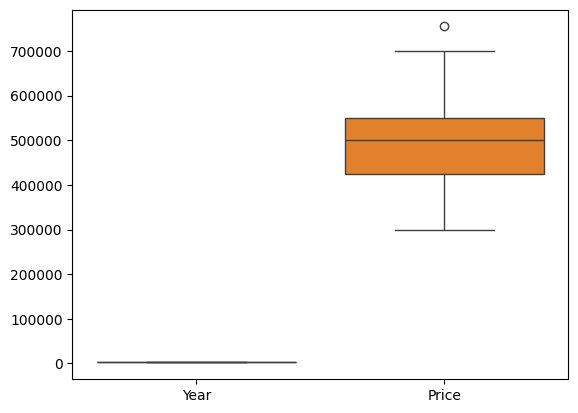

In [5]:
sns.boxplot(car_data)

'Price' column has an outlier.

### Histogrm to check distribution

<Axes: xlabel='Price', ylabel='Count'>

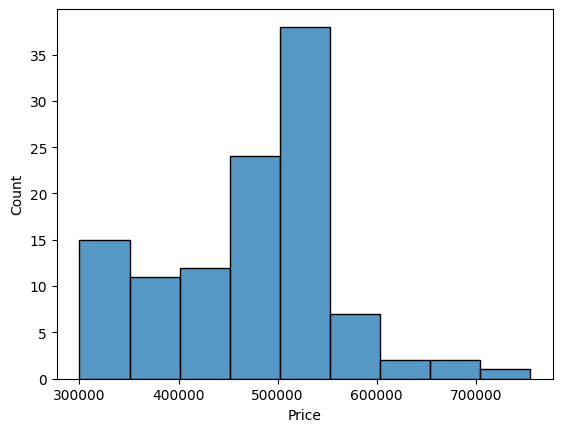

In [6]:
sns.histplot(car_data.Price)

In [7]:
car_data.Price.skew()

-0.08071088373618539

Column 'Price' exhibits a normal distribution. So use Z score method for outlier detection.

### Z score method for outlier detection

In [8]:
z_scores=zscore(car_data.Price)
threshold=2.5
outlier=car_data[(z_scores > threshold)|(z_scores < -threshold)]
outlier

,Year,Price
1,2019,755000


### Outlier handling using corresponding mean value

In [9]:
car_data.Price.iloc[outlier.index]=car_data[car_data.Year==outlier.Year[1]].mean()[1]
car_data.iloc[outlier.index]

<ipython-input-9-4ad23ec0c09d>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  car_data.Price.iloc[outlier.index]=car_data[car_data.Year==outlier.Year[1]].mean()[1]


,Year,Price
1,2019,577500


Replaced the outlier with corresponding (year 2019) mean price value.

### Check again for outliers using box plot

<Axes: >

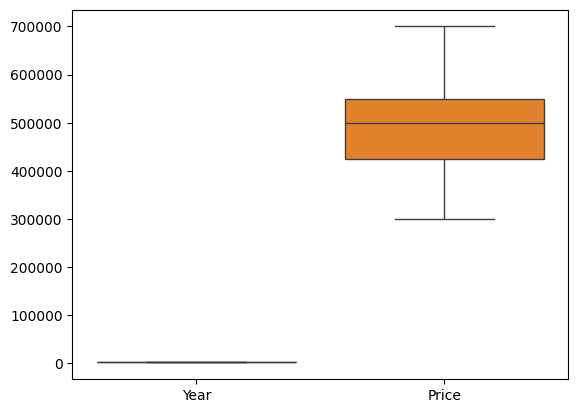

In [10]:
sns.boxplot(car_data)

Now there are no outliers present in the dataset.

# Find the best linear relationship between Year and Price

## Correlation

<Axes: >

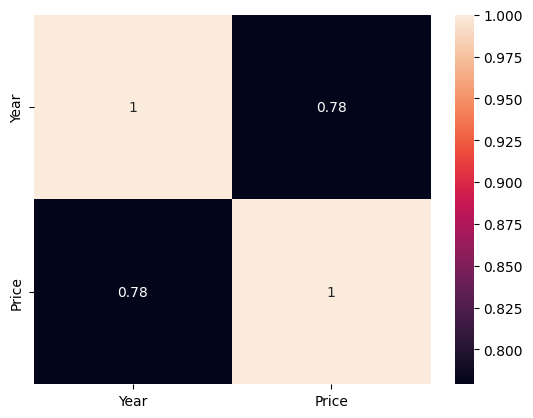

In [11]:
sns.heatmap(car_data.corr(),annot=True)

Shows a high positive correlation (0.78) between Year and Price. i.e. As year of making increases, price of second-hand Hyundai grand i10 car also increases.

<Axes: xlabel='Year', ylabel='Price'>

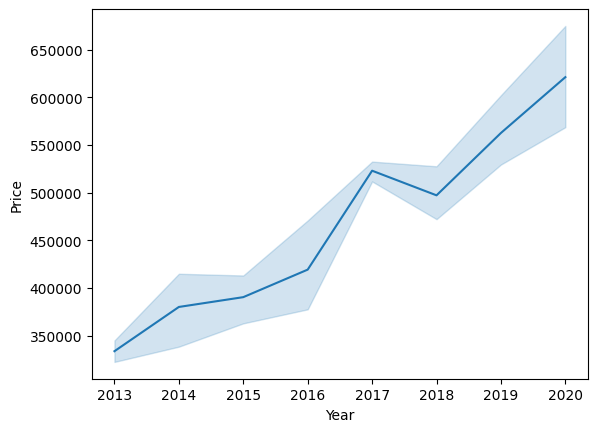

In [12]:
sns.lineplot(x=car_data.Year,y=car_data.Price)

Since there is a good linear relationship between two variables, we can go for linear regression model.

# Linear regression model

Target/ Dependent variable, y - Price

Predictor/ Independent variable, x - Year

In [13]:
x=car_data.Year.values.reshape(-1,1)
y=car_data.Price.values.reshape(-1,1)

## Without scaling

Split train and test data for both x and y variables and create a linear regression model using train data

Since size of dataset is low, take test size as 0.1

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
lin_reg=linear_model.LinearRegression()
lin_model=lin_reg.fit(x_train,y_train)

Predict the y values from x_test using created model

In [15]:
y_pred=lin_model.predict(x_test)

### Evaluation metrics

Mean squared error, Mean absolute error and R squared value

In [16]:
mse_linear=mean_squared_error(y_test,y_pred)
mae_linear=mean_absolute_error(y_test,y_pred)
r2_linear=r2_score(y_test,y_pred)
print('Mean Squared Error , MSE : ',mse_linear)
print('Mean Absolute Error , MAE : ',mae_linear)
print('R-Squared value :' ,r2_linear)

Mean Squared Error , MSE :  4398593165.859734
Mean Absolute Error , MAE :  58854.20322147384
R-Squared value : 0.6028112002434609


## With scaling

Do standard scaling on both predictor and target variables

In [17]:
sc=StandardScaler()
x_sc=sc.fit_transform(x)
y_sc=sc.fit_transform(y)

Create linear regression model using scaled variables and predict y values

In [18]:
x_sc_train,x_sc_test,y_sc_train,y_sc_test=train_test_split(x_sc,y_sc,test_size=0.1)
lin_model_sc=lin_reg.fit(x_sc_train,y_sc_train)
y_sc_pred=lin_model_sc.predict(x_sc_test)

### Evaluation metrics

In [19]:
mse_linear_sc=mean_squared_error(y_sc_test,y_sc_pred)
mae_linear_sc=mean_absolute_error(y_sc_test,y_sc_pred)
r2_linear_sc=r2_score(y_sc_test,y_sc_pred)
print('Mean Squared Error , MSE : ',mse_linear_sc)
print('Mean Absolute Error , MAE : ',mae_linear_sc)
print('R-Squared value :' ,r2_linear_sc)

Mean Squared Error , MSE :  0.33246281329945354
Mean Absolute Error , MAE :  0.5037711131012961
R-Squared value : 0.6166647789341241


# Predict the possible price of a 2022 model second-hand grand i10

Create a new dataframe with year 2022

In [20]:
x_new=pd.DataFrame({'Year':[2022]}).values.reshape(-1,1)

Predict car price of year 2022 using linear regression model

In [21]:
lin_model=lin_reg.fit(x_train,y_train)
y_pred_2022=lin_model.predict(x_new)
y_pred_2022

array([[697549.58216712]])

Possible price of a 2022 model second-hand grand i10 car is approximately rupees 7,08,642.

# Lasso regression model

Alpha parameter controls the regularization strength of Lasso regression. Default value is 1.

In [22]:
lasso = linear_model.Lasso(alpha=1)

## Without scaling

Create lasso regression model and predict y values

In [23]:
lasso_model=lasso.fit(x_train, y_train)
y_pred = lasso_model.predict(x_test)

### Evaluation metrics

In [24]:
mse_lasso=mean_squared_error(y_test,y_pred)
mae_lasso=mean_absolute_error(y_test,y_pred)
r2_lasso=r2_score(y_test,y_pred)
print('Mean Squared Error , MSE : ',mse_lasso)
print('Mean Absolute Error , MAE : ',mae_lasso)
print('R-Squared value :' ,r2_lasso)

Mean Squared Error , MSE :  4398631937.314546
Mean Absolute Error , MAE :  58854.49338320146
R-Squared value : 0.6028076992177873


## With scaling

Create lasso regression model using scaled variables and predict y values

In [25]:
lasso_model_sc=lasso.fit(x_sc_train,y_sc_train)
y_sc_pred=lasso_model_sc.predict(x_sc_test)

### Evaluation metrics

In [26]:
mse_lasso_sc=mean_squared_error(y_sc_test,y_sc_pred)
mae_lasso_sc=mean_absolute_error(y_sc_test,y_sc_pred)
r2_lasso_sc=r2_score(y_sc_test,y_sc_pred)
print('Mean Squared Error , MSE : ',mse_lasso_sc)
print('Mean Absolute Error , MAE : ',mae_lasso_sc)
print('R-Squared value :' ,r2_lasso_sc)

Mean Squared Error , MSE :  0.9241179869446178
Mean Absolute Error , MAE :  0.7793464243452285
R-Squared value : -0.06552359736333102


# Comparison between Linear regression and Lasso regression models

In [27]:
mux = pd.MultiIndex.from_product([['Without Scaling','With Scaling'],['Linear','Lasso']])
Metric=['MSE','MAE','R Squared']
comp_table = pd.DataFrame([[mse_linear,mse_lasso,mse_linear_sc,mse_lasso_sc],[mae_linear,mae_lasso,mae_linear_sc,mae_lasso_sc],[r2_linear,r2_lasso,r2_linear_sc,r2_lasso_sc]] , columns=mux)
comp_table.index=Metric
comp_table

Without Scaling               With Scaling          
                   Linear         Lasso       Linear     Lasso
MSE          4.398593e+09  4.398632e+09     0.332463  0.924118
MAE          5.885420e+04  5.885449e+04     0.503771  0.779346
R Squared    6.028112e-01  6.028077e-01     0.616665 -0.065524

Observations:

    1. Without the scaling of predictor and target variables, performances of both Linear regression and Lasso regression models are almost same.

    2. With scaling, Linear regression model exhibits good metric values ( low MSE and MAE values and high R squared value) compared to Lasso regression model. So we can say that, Linear regression model performs better than Lasso regression model for this dataset.
    
    3. Overall, in the case of given dataset, Linear regression model with scaled variables has high performance compared to other 3.